# Predicting Heart Disease
 ### 9/12/18

Attribute Information:
------------------------
-- 1. age

-- 2. sex

-- 3. chest pain type (4 values)

-- 4. resting blood pressure

-- 5. serum cholestoral in mg/dl

-- 6. fasting blood sugar > 120 mg/dl

-- 7. resting electrocardiographic results (values 0,1,2)

-- 8. maximum heart rate achieved

-- 9. exercise induced angina

-- 10. oldpeak = ST depression induced by exercise relative to rest

-- 11. the slope of the peak exercise ST segment

-- 12. number of major vessels (0-3) colored by flourosopy

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Attributes types
-----------------

Real: 1,4,5,8,10,12

Ordered:11,

Binary: 2,6,9

Nominal:7,3,13

Variable to be predicted
------------------------
Absence (1) or presence (2) of heart disease


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
# Data taken from : https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/
# 124 female sex, 56 male sex



df = pd.read_csv('train_values.csv')
dfpresent = pd.read_csv('train_labels.csv')

In [20]:
df = df.set_index('patient_id').join(dfpresent.set_index('patient_id'))
df.head(10)

slope_of_peak_exercise_st_segment               thal  \
patient_id                                                         
0z64un                                      1             normal   
ryoo3j                                      2             normal   
yt1s1x                                      1             normal   
l2xjde                                      1  reversible_defect   
oyt4ek                                      3  reversible_defect   
ldukkw                                      1             normal   
2gbyh9                                      2  reversible_defect   
daa9kp                                      2       fixed_defect   
3nwy2n                                      3  reversible_defect   
1r508r                                      2             normal   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
0z64un                         128                2                  0   
ryoo3j                         110                3                  0   
yt1s1x                         125                4                  3   
l2xjde                         152                4                  0   
oyt4ek                         178                1                  0   
ldukkw                         130                3                  0   
2gbyh9                         150                4                  2   
daa9kp                         150                4                  1   
3nwy2n                         170                4                  0   
1r508r                         120                3                  0   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
0z64un                                         0                    2   
ryoo3j                                         0                    0   
yt1s1x                                         0                    2   
l2xjde                                         0                    0   
oyt4ek                                         0                    2   
ldukkw                                         0                    0   
2gbyh9                                         0                    2   
daa9kp                                         0                    2   
3nwy2n                                         0                    2   
1r508r                                         0                    0   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
patient_id                                                                    
0z64un                              308                       0.0    1   45   
ryoo3j                              214                       1.6    0   54   
yt1s1x                              304                       0.0    1   77   
l2xjde                              223                       0.0    1   40   
oyt4ek                              270                       4.2    1   59   
ldukkw                              180                       0.0    1   42   
2gbyh9                              258                       2.6    0   60   
daa9kp                              276                       0.6    1   57   
3nwy2n                              326                       3.4    1   59   
1r508r                              219                       1.6    0   50   

            max_heart_rate_achieved  exercise_induced_angina  \
patient_id                                                     
0z64un                          170                        0   
ryoo3j                          158                        0   
yt1s1x                          162                        1   
l2xjde                          181                        0   
oyt4ek                          145                        0   
ldukkw                          

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


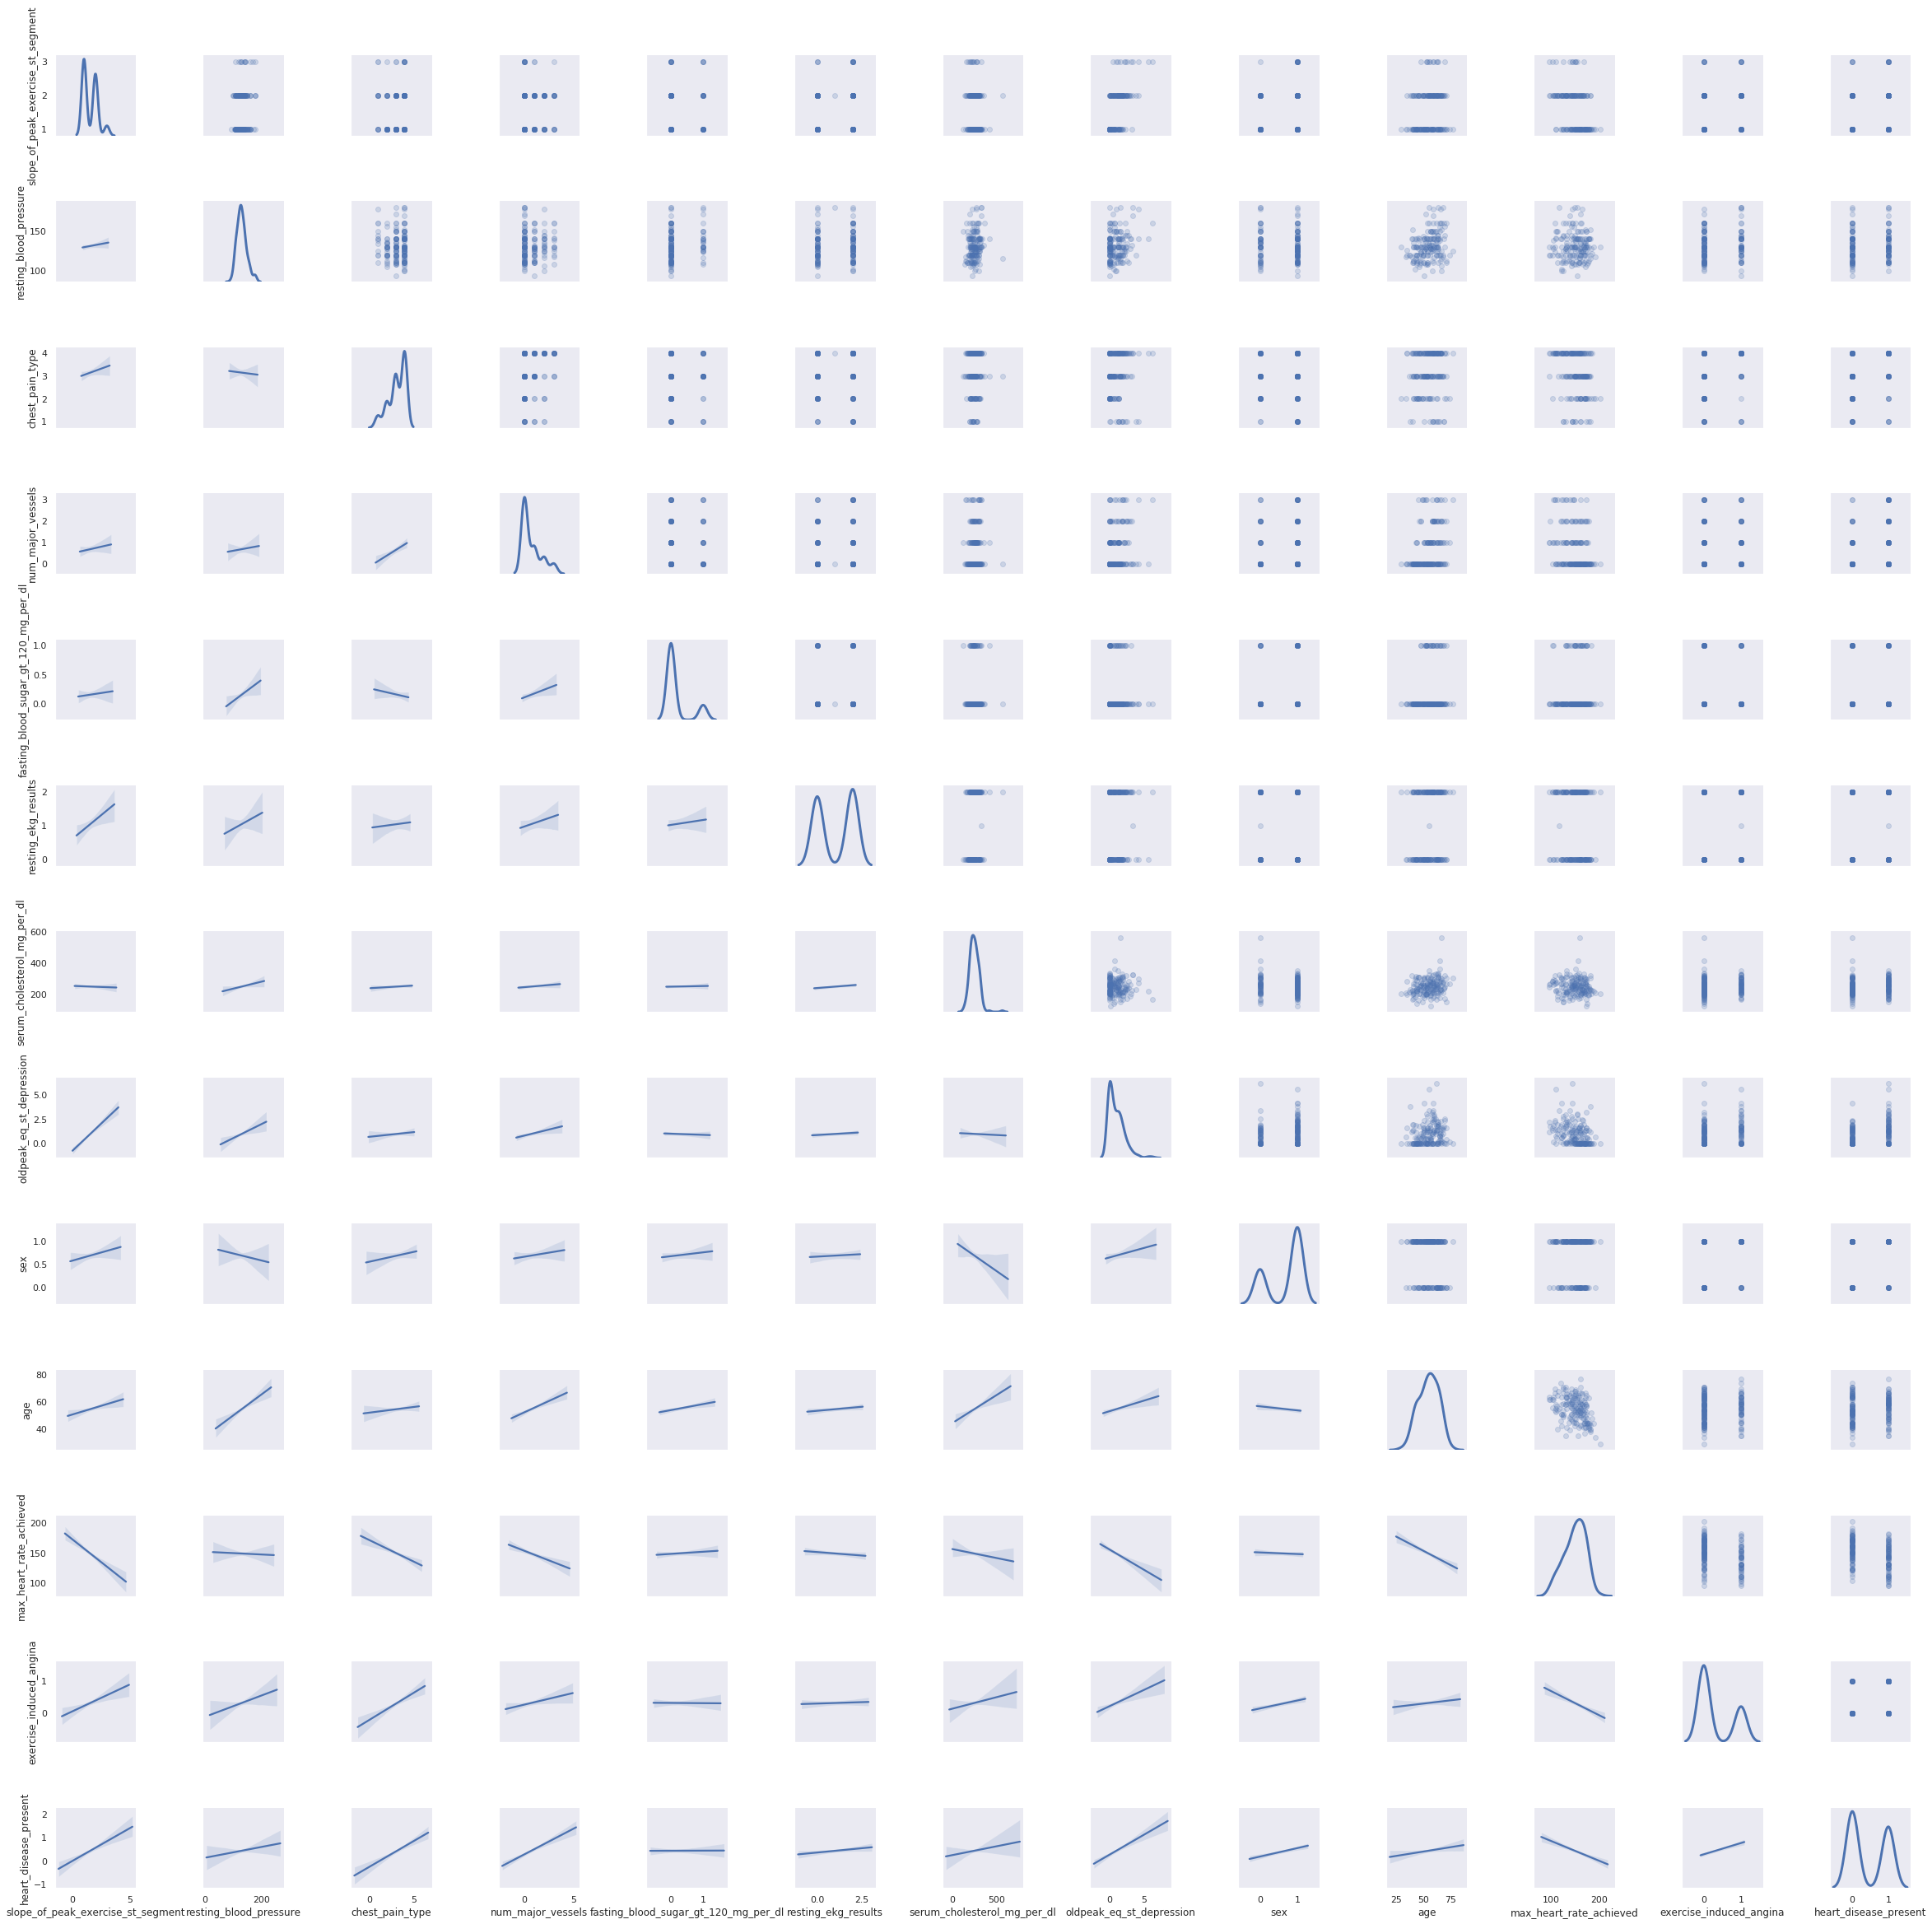

In [87]:
sns.set_style("dark")


# Make a scatterplot matrix.
g = sns.PairGrid(df.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.2)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                                      slope_of_peak_exercise_st_segment  \
slope_of_peak_exercise_st_segment                              1.000000   
resting_blood_pressure                                         0.098287   
chest_pain_type                                                0.121207   
num_major_vessels                                              0.076832   
fasting_blood_sugar_gt_120_mg_per_dl                           0.050199   
resting_ekg_results                                            0.172191   
serum_cholesterol_mg_per_dl                                   -0.032348   
oldpeak_eq_st_depression                                       0.615948   
sex                                                            0.093340   
age                                                            0.169918   
max_heart_rate_achieved                                       -0.418102   
exercise_induced_angina                                        0.225459   
heart_disease_present    

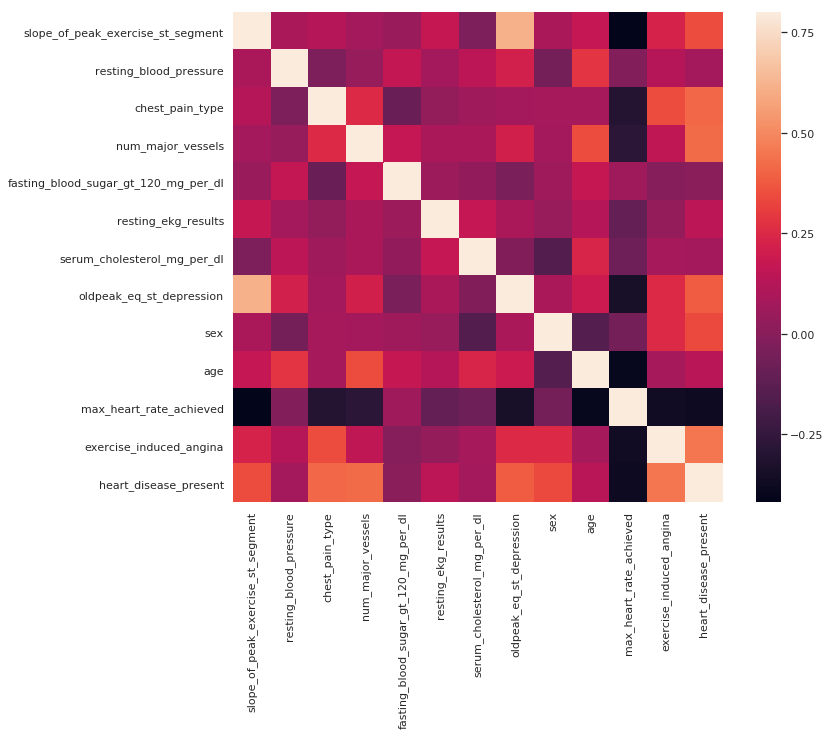

In [88]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


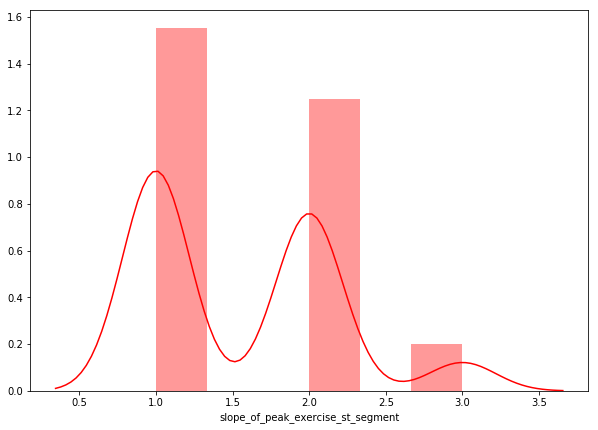

In [39]:

dfpeak1 = pd.DataFrame(df['slope_of_peak_exercise_st_segment'])
dfpeak1['oldpeak'] = df['oldpeak_eq_st_depression']
dfpeak1

plt.subplots(figsize=(10,7))
sns.distplot(dfpeak1['slope_of_peak_exercise_st_segment'], color='r')


(array([93.,  0.,  0.,  0.,  0., 75.,  0.,  0.,  0., 12.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

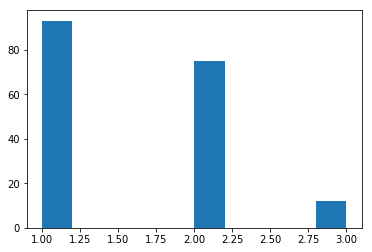

In [41]:
plt.hist(dfpeak1['slope_of_peak_exercise_st_segment'])

(array([51., 20.,  7.,  2.,  1.,  1.,  0.,  0.]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 8 Patch objects>)

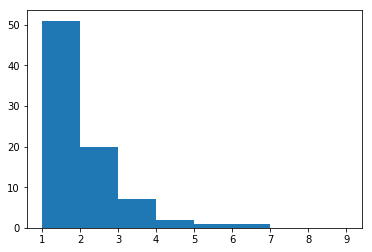

In [57]:
plt.hist(dfpeak1['oldpeak'],range(1,10))

In [38]:
dfpeak1

slope_of_peak_exercise_st_segment  oldpeak
patient_id                                            
0z64un                                      1      0.0
ryoo3j                                      2      1.6
yt1s1x                                      1      0.0
l2xjde                                      1      0.0
oyt4ek                                      3      4.2
ldukkw                                      1      0.0
2gbyh9                                      2      2.6
daa9kp                                      2      0.6
3nwy2n                                      3      3.4
1r508r                                      2      1.6
ldg4b9                                      2      0.4
xc17yq                                      1      0.0
mpggsq                                      1      0.0
zlyac8                                      2      0.2
f06u72                                      2      3.8
2fv3rc                                      2      0.9
qyrkxn                                      2      0.6
237mql                                      1      1.4
mc750a                                      1      0.0
30v796                                      1      0.0
cvux3j                                      1      0.4
k8899q                                      1      0.1
jhdvtb                                      1      0.3
5g9v0h                                      1      2.3
83asqd                                      1      0.0
gla0im                                      2      1.5
zzmfh7                                      1      0.0
f4g1ay                                      1      0.0
lek9q9                                      2      3.0
8265rl                                      1      0.6
...                                       ...      ...
x4yp0f                                      1      0.0
9at0il                                      3      0.5
nfag5b                                      2      1.6
strmq8                                      1      0.0
43k3gx                                      2      1.2
fz84ac                                      1      0.0
02cipp                                      1      1.8
1ennzl                                      1      0.2
isq8yp                                      1      0.0
ewckbx                                      2      2.4
dtljkq                                      1      0.6
a2kf1z                                      1      1.4
usnkhx                                      3      6.2
hltlsl                                      2      0.0
l0c19s                                      1      0.0
lcexsf                                      1      0.0
y3m2bd                                      1      0.0
qcjf51                                      1      0.8
7zbya5                                      3      2.3
23gf0e                                      2      1.8
qhz9ye                                      1      0.8
u25507                                      1      0.1
j9tw19                                      2      1.2
5o32oi                                      1      1.6
o63ri2                                      1      1.2
5qfar3                                      2      0.2
2s2b1f                                      2      3.4
nsd00i                                      2      1.8
0xw93k                                      1      0.0
2nx10r                                      1      0.0

[180 rows x 2 columns]

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


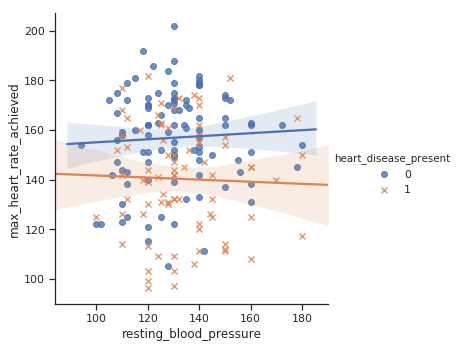

In [117]:
g = sns.lmplot(x="resting_blood_pressure", y='max_heart_rate_achieved', hue="heart_disease_present", data=df, markers=["o", "x"])

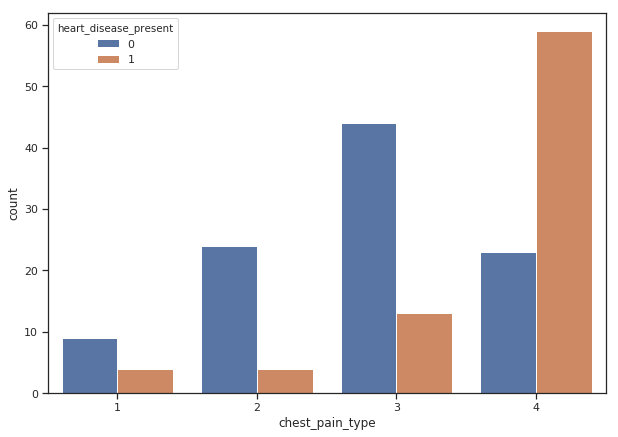

In [114]:
plt.subplots(figsize=(10,7))
ax = sns.countplot(x="chest_pain_type", hue="heart_disease_present", data=df)



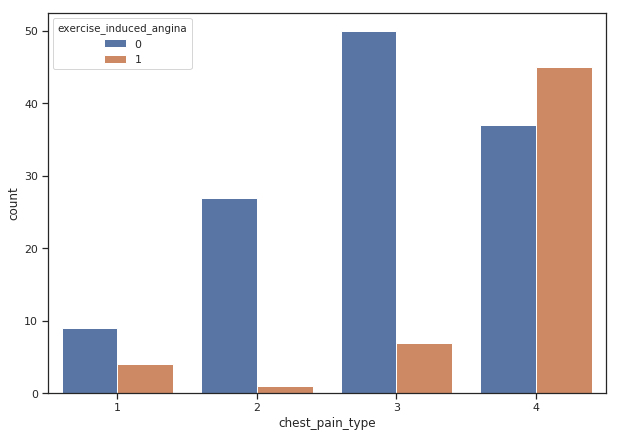

In [113]:
plt.subplots(figsize=(10,7))
ax = sns.countplot(x="chest_pain_type", hue="exercise_induced_angina", data=df)

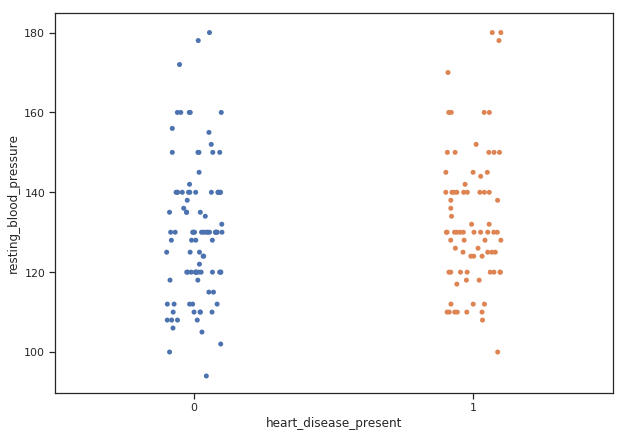

In [112]:
plt.subplots(figsize=(10,7))
ax = sns.stripplot(y="resting_blood_pressure", x="heart_disease_present", data=df, jitter=True)

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Ttest_indResult(statistic=-1.067732228096249, pvalue=0.28708726349665403)

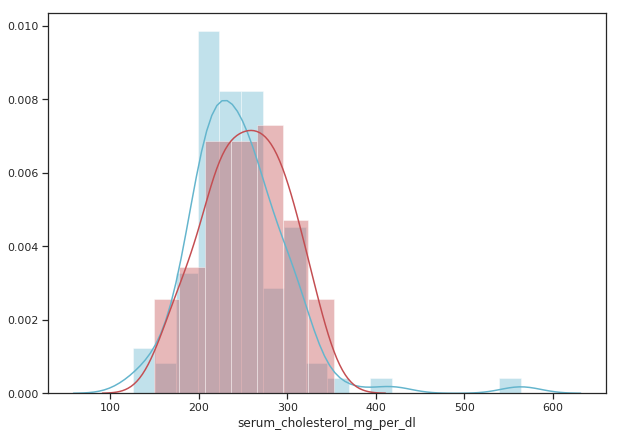

In [126]:
plt.subplots(figsize=(10,7))
sns.distplot(df.serum_cholesterol_mg_per_dl[df['heart_disease_present']==0], color='c')
sns.distplot(df.serum_cholesterol_mg_per_dl[df['heart_disease_present']==1], color='r')


stats.ttest_ind(df.serum_cholesterol_mg_per_dl[df['heart_disease_present']==0],df.serum_cholesterol_mg_per_dl[df['heart_disease_present']==1])

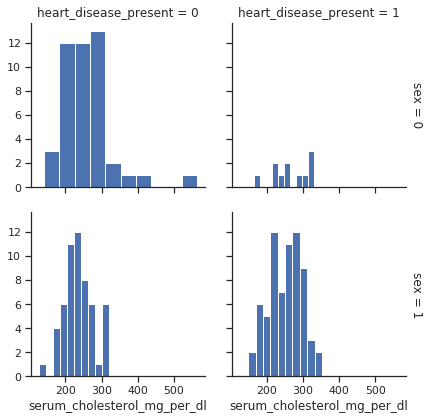

In [110]:
sns.set(style="ticks")

f = sns.FacetGrid(df, col="heart_disease_present", row='sex',margin_titles=True)
f = f.map(plt.hist, "serum_cholesterol_mg_per_dl")

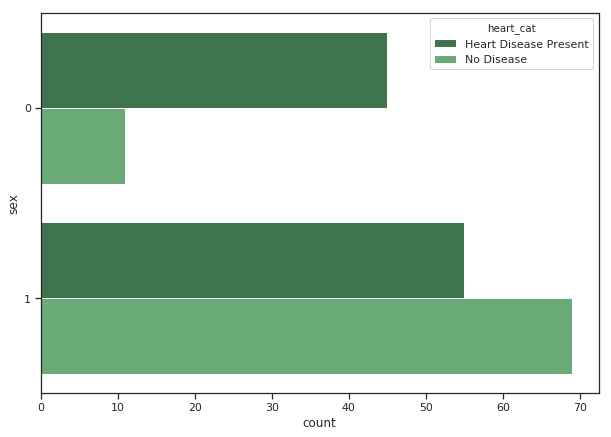

heart_cat              Heart Disease Present  No Disease
heart_disease_present                                   
0                                        100           0
1                                          0          80


In [120]:
plt.subplots(figsize=(10,7))
df_2cat = df


df_2cat['heart_cat'] = None
df_2cat.loc[df_2cat['heart_disease_present'] == 0, 'heart_cat'] = 'Heart Disease Present'
df_2cat.loc[df_2cat['heart_disease_present'] == 1, 'heart_cat'] = 'No Disease'


sns.countplot(y="sex", hue="heart_cat", data=df_2cat, palette="Greens_d")
plt.show()


counttable = pd.crosstab(df_2cat['heart_disease_present'], df_2cat['heart_cat'])
print(counttable)



resting_blood_pressure
count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

max_heart_rate_achieved
count    180.000000
mean     149.483333
std       22.063513
min       96.000000
25%      132.000000
50%      152.000000
75%      166.250000
max      202.000000
Name: max_heart_rate_achieved, dtype: float64


/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


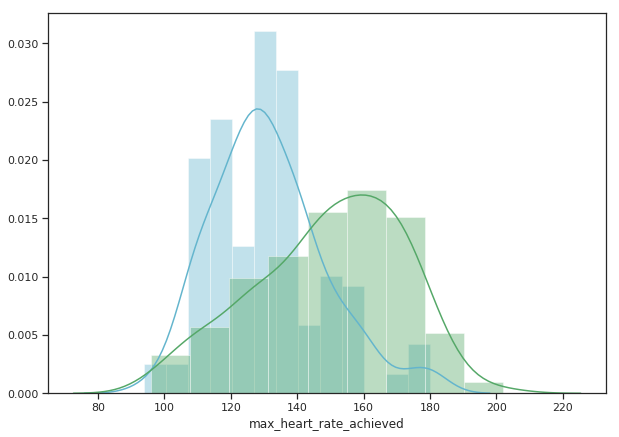

In [124]:
plt.subplots(figsize=(10,7))
sns.distplot(df.resting_blood_pressure, color='c')
sns.distplot(df.max_heart_rate_achieved, color='g')

print('resting_blood_pressure')
print(df.resting_blood_pressure.describe())

print('\nmax_heart_rate_achieved')
print(df.max_heart_rate_achieved.describe())

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Ttest_indResult(statistic=5.402862945678199, pvalue=2.0817058927035646e-07)

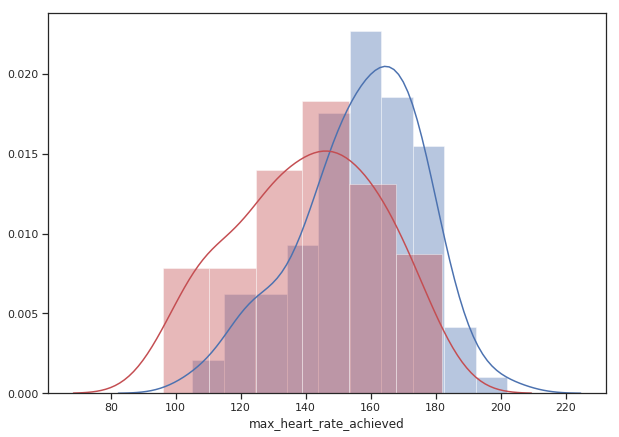

In [129]:
plt.subplots(figsize=(10,7))
sns.distplot(df.max_heart_rate_achieved[df['heart_disease_present']==0], color='b')
sns.distplot(df.max_heart_rate_achieved[df['heart_disease_present']==1], color='r')


stats.ttest_ind(df.max_heart_rate_achieved[df['heart_disease_present']==0],df.max_heart_rate_achieved[df['heart_disease_present']==1])

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Ttest_indResult(statistic=-1.050639778820372, pvalue=0.2948483625770824)

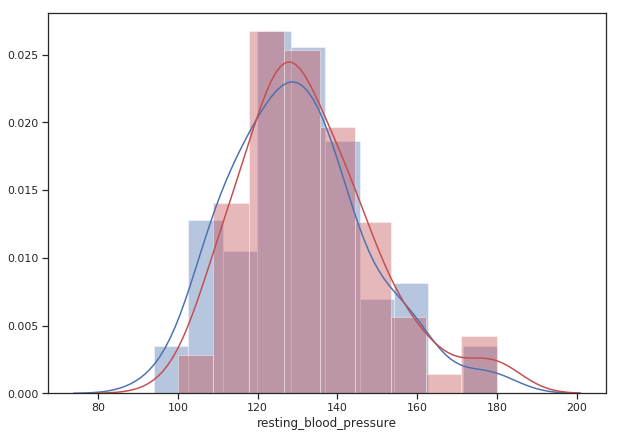

In [128]:
plt.subplots(figsize=(10,7))
sns.distplot(df.resting_blood_pressure[df['heart_disease_present']==0], color='b')
sns.distplot(df.resting_blood_pressure[df['heart_disease_present']==1], color='r')


stats.ttest_ind(df.resting_blood_pressure[df['heart_disease_present']==0],df.resting_blood_pressure[df['heart_disease_present']==1])

In [31]:
df[df['age'] < 30].count()

slope_of_peak_exercise_st_segment       1
thal                                    1
resting_blood_pressure                  1
chest_pain_type                         1
num_major_vessels                       1
fasting_blood_sugar_gt_120_mg_per_dl    1
resting_ekg_results                     1
serum_cholesterol_mg_per_dl             1
oldpeak_eq_st_depression                1
sex                                     1
age                                     1
max_heart_rate_achieved                 1
exercise_induced_angina                 1
heart_disease_present                   1
heart_cat                               1
dtype: int64

In [68]:
features = pd.DataFrame(df['heart_disease_present'])

In [69]:
features['adult_65plus'] = np.where(df['age']>=65, 1, 0)

In [101]:
features['bad_chest'] = np.where((df['exercise_induced_angina']==1) & (df['chest_pain_type']==4), 1, 0)
features['good_chest'] = np.where((df['exercise_induced_angina']==0) & (df['chest_pain_type']==1), 1, 0)
features['max_heart_age'] = df['max_heart_rate_achieved']/(df['age'])
features['pressure_age'] = df['resting_blood_pressure']/(df['age'])
features['heart_disease_present'] = df['heart_disease_present']
features['chest_pain'] = df['chest_pain_type']
features['sex'] = df['sex']
features['age'] = df['age']
features['exercise_induced_angina'] = df['exercise_induced_angina']
features['fasting_blood_sugar_gt_120_mg_per_dl'] = df['fasting_blood_sugar_gt_120_mg_per_dl']

                                      heart_disease_present  adult_65plus  \
heart_disease_present                              1.000000     -0.057444   
adult_65plus                                      -0.057444      1.000000   
bad_chest                                          0.516398     -0.043624   
good_chest                                        -0.051299      0.107473   
max_heart_age                                     -0.291634     -0.398216   
pressure_age                                      -0.091049     -0.409950   
chest_pain                                         0.412829      0.007894   
sex                                                0.335421     -0.162486   
age                                                0.138255      0.620907   
exercise_induced_angina                            0.448647     -0.038442   
fasting_blood_sugar_gt_120_mg_per_dl               0.003379      0.095684   

                                      bad_chest  good_chest  max_heart_age 

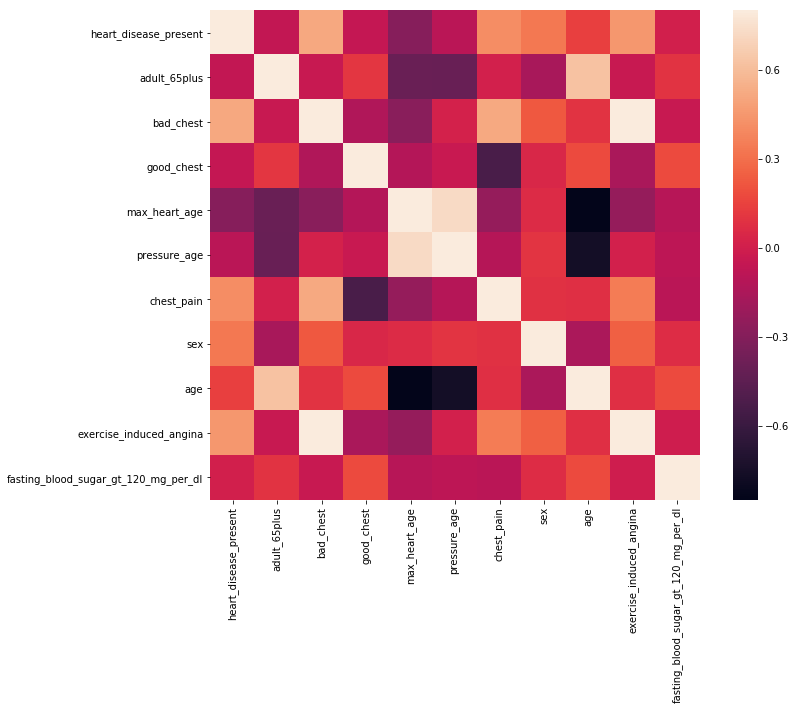

In [102]:
# Make the correlation matrix.
corrmat = features.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [98]:
df.max_heart_rate_achieved.describe()

count    180.000000
mean     149.483333
std       22.063513
min       96.000000
25%      132.000000
50%      152.000000
75%      166.250000
max      202.000000
Name: max_heart_rate_achieved, dtype: float64

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


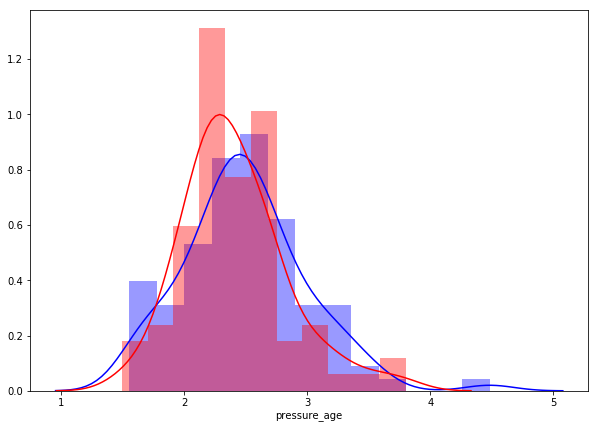

In [103]:
plt.subplots(figsize=(10,7))
sns.distplot(features.pressure_age[features['heart_disease_present']==0], color='b')
sns.distplot(features.pressure_age[features['heart_disease_present']==1], color='r')


/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


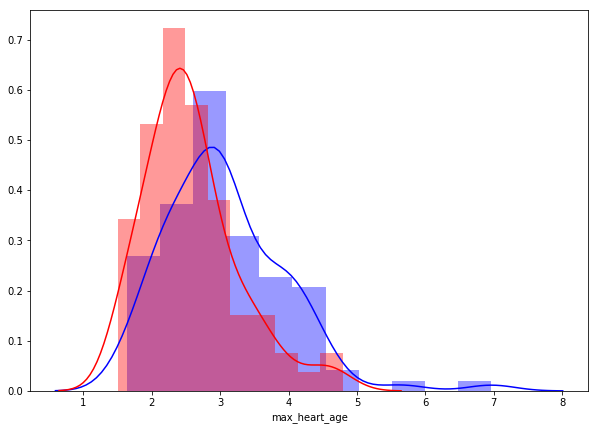

In [104]:
plt.subplots(figsize=(10,7))
sns.distplot(features.max_heart_age[features['heart_disease_present']==0], color='b')
sns.distplot(features.max_heart_age[features['heart_disease_present']==1], color='r')

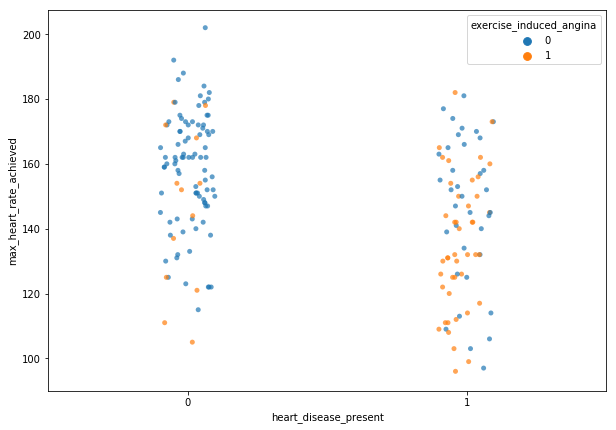

In [79]:
plt.subplots(figsize=(10,7))
ax = sns.stripplot(x="heart_disease_present", y="max_heart_rate_achieved", hue="exercise_induced_angina", data=df, jitter=True, alpha=.7)